In [179]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import statsmodels.api as sm

In [180]:
mergedf = pd.read_csv("mergedfupdate_new.csv")
# print mergedf.shape
# mergedf.columns = ['DBN', 'Grade', 'Year', 'Number_Tested', 'Mean_Scale_Score', 'Num_Level1', 'Pct_Level1', 'Num_Level2', 'Pct_Level2', 'Num_Level3', 'Pct_Level3', 'Num_Level4', 'Pct_Level4', 'Num_Level3_and4', 'Pct_Level3_and4', 'School_Type', 'School_Name_x', 'Borough', 'Program_Type', 'Average_Class_Size', 'School_Name_y', 'Female_Percentage', 'Male_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage', 'Other_Percentage', 'White_Percentage', 'Avg_Major_N', 'Avg_No_Crim_N', 'Avg_Vio_N', 'School_Name', 'Eng_p_11', 'Aca_p_11', 'Eng_t_11', 'Aca_t_11', 'Eng_s_11', 'Aca_s_11', 'Funding']
# print mergedf.shape

In [181]:
mergedf =  mergedf[mergedf["Funding"] != 0]
mergedf.shape

(6041, 39)

In [182]:
from sklearn import linear_model
import statsmodels.formula.api as sm
mergedf["Female_Percentage"]

0       0.443
1       0.443
2       0.443
3       0.443
4       0.527
5       0.527
6       0.527
7       0.527
8       0.527
9       0.467
10      0.467
11      0.467
12      0.467
13      0.467
14      0.494
15      0.494
16      0.494
17      0.494
18      0.494
19      0.494
20      0.494
21      0.494
22      0.494
23      0.494
24      0.494
25      0.494
26      0.425
27      0.425
28      0.425
29      0.425
        ...  
6011      NaN
6012      NaN
6013      NaN
6014      NaN
6015      NaN
6016      NaN
6017      NaN
6018      NaN
6019      NaN
6020      NaN
6021      NaN
6022      NaN
6023      NaN
6024      NaN
6025      NaN
6026      NaN
6027      NaN
6028      NaN
6029      NaN
6030      NaN
6031      NaN
6032      NaN
6033      NaN
6034      NaN
6035      NaN
6036      NaN
6037      NaN
6038      NaN
6039      NaN
6040      NaN
Name: Female_Percentage, dtype: float64

In [131]:
counter = 0
for i in mergedf.iterrows():
    if i[1]["School_Type"] == "Public":
        mergedf.ix[counter, "School_Type"] = 1
    counter +=1
counter1 = 0
for i in mergedf.iterrows():
    if i[1]["School_Type"] == "Charter":
        mergedf.ix[counter1, "School_Type"] = 0
    counter1 +=1

In [113]:
mergedf.head()

,DBN,Grade,Year,Number_Tested,Mean_Scale_Score,Num_Level1,Pct_Level1,Num_Level2,Pct_Level2,Num_Level3,Pct_Level3,Num_Level4,Pct_Level4,Num_Level3_and4,Pct_Level3_and4,School_Type,School_Name_x,Borough,Program_Type,Average_Class_Size,School_Name_y,Female_Percentage,Male_Percentage,Asian_Percentage,Black_Percentage,Hispanic_Percentage,Other_Percentage,White_Percentage,Avg_Major_N,Avg_No_Crim_N,Avg_Vio_N,School_Name,Eng_p_11,Aca_p_11,Eng_t_11,Aca_t_11,Eng_s_11,Aca_s_11,Funding
0,01M015,3,2011,28,671,10,35.7,13,46.4,5,17.9,0,0,5,17.9,1,M,P.S. 015 Roberto Clemente,GEN ED,12.000000,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
1,01M015,4,2011,28,668,3,10.7,14,50,9,32.1,2,7.1,11,39.3,1,M,P.S. 015 Roberto Clemente,GEN ED,13.000000,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
2,01M015,5,2011,25,667,5,20,8,32,12,48,0,0,12,48,1,M,P.S. 015 Roberto Clemente,GEN ED,27.000000,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
3,01M015,All Grades,2011,81,669,18,22.2,35,43.2,26,32.1,2,2.5,28,34.6,1,NaN,NaN,NaN,21.780762,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
4,01M019,3,2011,34,679,2,5.9,23,67.6,7,20.6,2,5.9,9,26.5,1,M,P.S. 019 Asher Levy,GEN ED,17.500000,P.S. 019 Asher Levy,0.527,0.473,0.146,0.271,0.473,0.015,0.095,NaN,2.44093,NaN,P.S. 019 Asher Levy,7.6,7.8,8.9,9.1,NaN,NaN,1801509


In [114]:
mergedf.head()

,DBN,Grade,Year,Number_Tested,Mean_Scale_Score,Num_Level1,Pct_Level1,Num_Level2,Pct_Level2,Num_Level3,Pct_Level3,Num_Level4,Pct_Level4,Num_Level3_and4,Pct_Level3_and4,School_Type,School_Name_x,Borough,Program_Type,Average_Class_Size,School_Name_y,Female_Percentage,Male_Percentage,Asian_Percentage,Black_Percentage,Hispanic_Percentage,Other_Percentage,White_Percentage,Avg_Major_N,Avg_No_Crim_N,Avg_Vio_N,School_Name,Eng_p_11,Aca_p_11,Eng_t_11,Aca_t_11,Eng_s_11,Aca_s_11,Funding
0,01M015,3,2011,28,671,10,35.7,13,46.4,5,17.9,0,0,5,17.9,1,M,P.S. 015 Roberto Clemente,GEN ED,12.000000,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
1,01M015,4,2011,28,668,3,10.7,14,50,9,32.1,2,7.1,11,39.3,1,M,P.S. 015 Roberto Clemente,GEN ED,13.000000,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
2,01M015,5,2011,25,667,5,20,8,32,12,48,0,0,12,48,1,M,P.S. 015 Roberto Clemente,GEN ED,27.000000,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
3,01M015,All Grades,2011,81,669,18,22.2,35,43.2,26,32.1,2,2.5,28,34.6,1,NaN,NaN,NaN,21.780762,P.S. 015 Roberto Clemente,0.443,0.557,0.064,0.369,0.542,0.005,0.020,0.43,1.23000,0.41,P.S. 015 Roberto Clemente,7.5,7.8,7.6,7.9,NaN,NaN,1560936
4,01M019,3,2011,34,679,2,5.9,23,67.6,7,20.6,2,5.9,9,26.5,1,M,P.S. 019 Asher Levy,GEN ED,17.500000,P.S. 019 Asher Levy,0.527,0.473,0.146,0.271,0.473,0.015,0.095,NaN,2.44093,NaN,P.S. 019 Asher Levy,7.6,7.8,8.9,9.1,NaN,NaN,1801509


In [115]:
np.corrcoef(mergedf["Funding"], mergedf["Average_Class_Size"], mergedf["Mean_Scale_Score"], mergedf["Avg_No_Crim_N"], mergedf["School_Type"],mergedf["School_Type"], mergedf["Female_Percentage"], mergedf["Asian_Percentage"], mergedf["Black_Percentage"], mergedf["Hispanic_Percentage"] )

TypeError: corrcoef() takes at most 5 arguments (10 given)

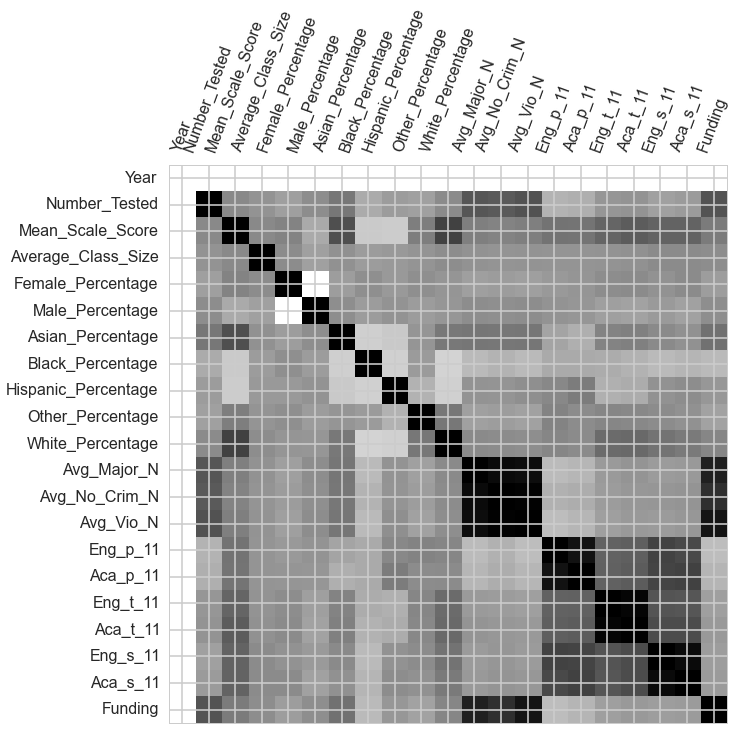

In [132]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(mergedf)


In [117]:
# mergedf.corr()

In [118]:
np.max(mergedf["Mean_Scale_Score"])

759.0

In [133]:
# linear
score_model = sm.ols("Mean_Scale_Score ~ np.log(Funding) + Average_Class_Size + Avg_No_Crim_N + School_Type + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage + White_Percentage", data=mergedf, missing='drop').fit()
print score_model.summary()
# survey_model = sm.ols("Aca_t_11 ~ np.log(Funding) + Average_Class_Size + Avg_No_Crim_N + School_Type + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage", data=mergedf, missing='drop').fit()
# print survey_model.summary()
score_model2 = sm.ols("Mean_Scale_Score ~ np.log(Funding)  + Avg_No_Crim_N + School_Type + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage ", data=mergedf, missing='drop').fit()
print score_model2.summary()

                            OLS Regression Results                            
Dep. Variable:       Mean_Scale_Score   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     766.8
Date:                Wed, 02 Dec 2015   Prob (F-statistic):               0.00
Time:                        16:22:44   Log-Likelihood:                -22881.
No. Observations:                5912   AIC:                         4.578e+04
Df Residuals:                    5902   BIC:                         4.585e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               699.28

In [120]:
score_model2.params

Intercept                672.454097
School_Type[T.Public]      2.347989
np.log(Funding)            1.119116
Avg_No_Crim_N              0.045943
Female_Percentage         43.249134
Asian_Percentage          -0.093382
Black_Percentage         -41.618544
Hispanic_Percentage      -43.444417
dtype: float64

In [138]:
allcolumns = mergedf.columns 
dropcolumns = []
for title in allcolumns:
    #create array of columns to drop in dropcolumns array
    if title in ["Avg_No_Crim_N", "Female_Percentage", "Asian_Percentage", "Black_Percentage", "Hispanic_Percentage"]:
        continue   
    else:
        dropcolumns.append(title)
#drop irrelevant columns and edit column format so they can merge
x = mergedf.drop(dropcolumns, axis = 1)

mergedf["Female_Percentage"]

0       0.443
1       0.443
2       0.443
3       0.443
4       0.527
5       0.527
6       0.527
7       0.527
8       0.527
9       0.467
10      0.467
11      0.467
12      0.467
13      0.467
14      0.494
15      0.494
16      0.494
17      0.494
18      0.494
19      0.494
20      0.494
21      0.494
22      0.494
23      0.494
24      0.494
25      0.494
26      0.425
27      0.425
28      0.425
29      0.425
        ...  
6667    0.529
6668    0.531
6669    0.531
6670    0.531
6671    0.531
6672    0.531
6673    0.531
6674    0.504
6675    0.504
6676    0.504
6677    0.504
6678    0.504
6679    0.504
6680    0.504
6681    0.568
6682    0.568
6683    0.568
6684    0.568
6685    0.568
6686    0.568
6687    0.568
6688    0.547
6689    0.547
6690    0.547
6691    0.547
6692    0.473
6693    0.473
6694    0.473
6695    0.473
6696    0.473
Name: Female_Percentage, dtype: float64

In [122]:
counter = 0
array_crime = []
for i in x.iterrows():
    if ~np.isnan(i[1]["Avg_No_Crim_N"]) and (i[1]["Avg_No_Crim_N"] != "NaN"):
#         print "hi"
        array_crime.append(i[1]["Avg_No_Crim_N"])
print np.mean(array_crime)
for i in mergedf.iterrows():
    if np.isnan(i[1]["Avg_No_Crim_N"]):
        x.ix[counter, "Avg_No_Crim_N"] = np.mean(array_crime)
    counter +=1
counter1 = 0
array_f = []
for i in x.iterrows():
    if ~np.isnan(i[1]["Female_Percentage"]):
#         print "hi"
        array_f.append(i[1]["Female_Percentage"])
print np.mean(array_f)
for i in mergedf.iterrows():
    if np.isnan(i[1]["Female_Percentage"]):
        x.ix[counter1, "Female_Percentage"] = np.mean(array_f)
    counter1 +=1
counter2 = 0
array_a = []
for i in x.iterrows():
    if ~np.isnan(i[1]["Asian_Percentage"]):
#         print "hi"
        array_a.append(i[1]["Asian_Percentage"])
print np.mean(array_a)
for i in mergedf.iterrows():
    if np.isnan(i[1]["Asian_Percentage"]):
        x.ix[counter2, "Asian_Percentage"] = np.mean(array_a)
    counter2 +=1
counter3 = 0
array_b = []
for i in x.iterrows():
    if ~np.isnan(i[1]["Black_Percentage"]):
#         print "hi"
        array_b.append(i[1]["Black_Percentage"])
print np.mean(array_b)
for i in mergedf.iterrows():
    if np.isnan(i[1]["Black_Percentage"]):
        x.ix[counter3, "Black_Percentage"] = np.mean(array_b)
    counter3 +=1
counter4 = 0
array_h = []
for i in x.iterrows():
    if ~np.isnan(i[1]["Hispanic_Percentage"]):
#         print "hi"
        array_h.append(i[1]["Hispanic_Percentage"])
print np.mean(array_h)
for i in mergedf.iterrows():
    if np.isnan(i[1]["Hispanic_Percentage"]):
        x.ix[counter4, "Hispanic_Percentage"] = np.mean(array_h)
    counter4 +=1

2.46381847707
0.494737496183
0.106498666761
0.314763303681
0.445697244305


In [139]:
for i in x["Avg_No_Crim_N"]:
    if np.isnan(i):
        print "hi"

In [163]:
# X = y.values.astype(np.double)
Y = mergedf["Mean_Scale_Score"].values.astype(np.double)
X = x.values.astype(np.double)

for i in x["Avg_No_Crim_N"]:
    if np.isnan(i):
        print "Hi"

print X
# X = []
# for i in Xdf:
# #     print i
#     if ~np.isnan(i):
#         X.append(i)

# print X
# X /= X.std(axis=0)
# print X
# mergedf["Mean_Scale_Score"].shape

[[ 0.443       0.064       0.369       0.542       1.23      ]
 [ 0.443       0.064       0.369       0.542       1.23      ]
 [ 0.443       0.064       0.369       0.542       1.23      ]
 ..., 
 [ 0.473       0.006       0.287       0.644       2.44092983]
 [ 0.473       0.006       0.287       0.644       2.44092983]
 [ 0.473       0.006       0.287       0.644       2.44092983]]


In [175]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
dX = diabetes.data
dy = diabetes.target
# print X.shape
dX /= dX.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)
# print X.shape
# # Compute paths

# eps = 5e-3  # the smaller it is the longer is the path

# print("Computing regularization path using the lasso...")
# alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

# print("Computing regularization path using the positive lasso...")
# alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
#     X, y, eps, positive=True, fit_intercept=False)
# print("Computing regularization path using the elastic net...")
# alphas_enet, coefs_enet, _ = enet_path(
#     X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

# print("Computing regularization path using the positve elastic net...")
# alphas_positive_enet, coefs_positive_enet, _ = enet_path(
#     X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# # Display results

# plt.figure(1)
# ax = plt.gca()
# ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
# l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
# l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

# plt.xlabel('-Log(alpha)')
# plt.ylabel('coefficients')
# plt.title('Lasso and Elastic-Net Paths')
# plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
# plt.axis('tight')


# plt.figure(2)
# ax = plt.gca()
# ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
# l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
# l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
#               linestyle='--')

# plt.xlabel('-Log(alpha)')
# plt.ylabel('coefficients')
# plt.title('Lasso and positive Lasso')
# plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
# plt.axis('tight')


# plt.figure(3)
# ax = plt.gca()
# ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
# l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
# l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
#               linestyle='--')

# plt.xlabel('-Log(alpha)')
# plt.ylabel('coefficients')
# plt.title('Elastic-Net and positive Elastic-Net')
# plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
#            loc='lower left')
# plt.axis('tight')
# plt.show()
print X.shape
print y.shape

Automatically created module for IPython interactive environment
(6697, 5)
(442,)


Computing regularization path using the lasso...
Computing regularization path using the elastic net...


ValueError: x and y must have same first dimension

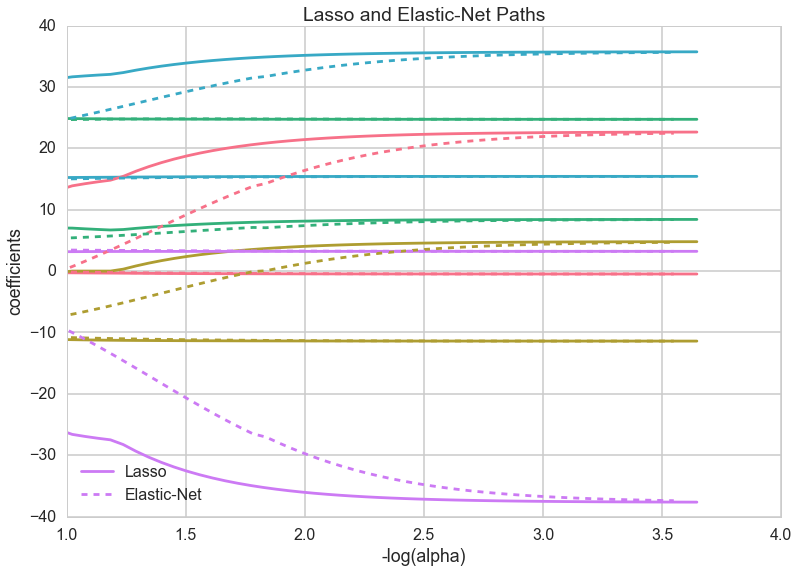

In [176]:
from sklearn.linear_model import lasso_path, enet_path
eps = 5e-6  # the smaller it is the longer is the path

# X = mergedf["Mean_Scale_Score"]

# print X
# y = mergedf["Avg_No_Crim_N", "Female_Percentage", "Asian_Percentage", "Black_Percentage", "Hispanic_Percentage"]
# print y
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(dX, dy, eps = eps, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(dX, dy, eps=eps, l1_ratio=0.8, fit_intercept=False)

col = sns.color_palette("husl", 5)

# make the lasso path
plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')
plt.xlim([1, 4])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')

col = sns.color_palette("hls", 5)

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(col)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T[: 5])
plt.xlim([1, 4])

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths (largest coefficients)')
plt.legend(l2, list(mergedf.columns.values[5]), loc='upper left')

In [178]:
print  len(-np.log10(alphas_enet)), len(coefs_enet.T)

100 100


In [177]:

intercept = score_model2.params[0]
Funding =score_model2.params[1] 
Crime_number = score_model2.params[2]
Female_perc = score_model2.params[3]
Asian_perc = score_model2.params[4]
Black_perc = score_model2.params[5]
Hispanic_perc = score_model2.params[6]


    
regression = {"intercept": intercept, "Funding": Funding , "Crime_number":Crime_number , "Female%": Female_perc , "Asian%": Asian_perc, "Black%": Black_perc, "Hispanic%": Hispanic_perc }

import json
with open('regression.json', 'w') as fp:
    json.dump(regression, fp)

In [ ]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = "Mean_Scale_Score ~ Funding + Average_Class_Size + Avg_No_Crim_N + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage"
reg_results = sm.ols(f, data=grade3).fit().summary()

sns.set(style="ticks") 
mpl.rc("figure", figsize=(10, 15))

sns.coefplot(f,grade3,intercept=False);

In [ ]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = "Aca_t_11 ~ np.log(Funding) + Average_Class_Size + Avg_No_Crim_N + School_Type + Female_Percentage + Asian_Percentage + Black_Percentage + Hispanic_Percentage"
reg_results = sm.ols(f, data=grade3).fit().summary()

sns.set(style="ticks") 
mpl.rc("figure", figsize=(10, 15))

sns.coefplot(f,grade3,intercept=False);


In [ ]:
#plot the variables on two graphs, or plot on one graph separating the school type by dot color 
g = sns.FacetGrid(grade3, col="School_Type")
g.map(plt.scatter, "Asian_Percentage", "Mean_Scale_Score", alpha=.7)
g.add_legend();

g = sns.FacetGrid(grade3, col="School_Type")
g.map(plt.scatter, "Black_Percentage", "Mean_Scale_Score", alpha=.7)
g.add_legend();

g = sns.FacetGrid(grade3, col="School_Type")
g.map(plt.scatter, "Hispanic_Percentage", "Mean_Scale_Score", alpha=.7)
g.add_legend();


g = sns.FacetGrid(grade3, hue = "School_Type")
g.map(plt.scatter, "Other_Percentage", "Mean_Scale_Score", alpha=.7)
g.add_legend();

g = sns.FacetGrid(grade3, hue = "School_Type")
g.map(plt.scatter, "Average_Class_Size", "Mean_Scale_Score", alpha=.7)
g.add_legend();

g = sns.FacetGrid(grade3, hue = "School_Type")
g.map(plt.scatter, "Avg_No_Crim_N", "Mean_Scale_Score", alpha=.7)
g.add_legend();

g = sns.FacetGrid(grade3, col="School_Type")
g.map(plt.scatter, "White_Percentage", "Mean_Scale_Score", alpha=.7)
g.add_legend();

g = sns.FacetGrid(grade3, hue="School_Type")
g.map(plt.scatter, "White_Percentage", "Mean_Scale_Score", alpha=.7)
g.add_legend();


In [ ]:
# then we want to find the optimal class size
# first split the data into train and test sets
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(newgrade3.shape[0]), train_size=0.7)

In [ ]:
# mask
mask=np.ones(newgrade3.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask.shape, mask.sum()

In [ ]:
# train a SVM on this data
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# columns = 
Xcsize = newgrade3[['Average_Class_Size', "School_Type", "Asian_Percentage", "Black_Percentage", "Hispanic_Percentage"]].values
Yscore = newgrade3['Mean_Scale_Score'].values
Xcsize_train = Xcsize[mask]
Xcsize_test = Xcsize[~mask]
Yscore_train = Yscore[mask]
Yscore_test = Yscore[~mask]

In [ ]:
Yscore2 = newgrade3['Aca_t_11'].values
# print Scsize_train.size
# for i in Yscore:
#     print type(i)
Yscore_train2 = Yscore2[mask]
print Yscore_train2
Yscore_test2 = Yscore2[~mask]

In [ ]:
# get the best fit classifier using 5-fold cross validation
from sklearn import grid_search
clf = LinearSVC(loss = 'hinge')
parameters = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
best = grid_search.GridSearchCV(clf, param_grid=parameters, cv=5, scoring="accuracy")
# we have too many nan's for class size, need to think more about what variable to use 
# best.fit(Xcsize_train, Yscore_train)
# best.best_estimator_, best.best_params_, best.best_score_, best.grid_scores_

In [ ]:
parameters = {"C": Cs}
best = grid_search.GridSearchCV(clfsvm, param_grid=parameters, cv=5)
# best2.fit(Xcsize_train, Yscore_train)
# we have too many nan's for class size, need to think more about what variable to use 
best.fit(Xcsize_train, Yscore_train)
# print "best estimator", best.best_estimator_.score
best.best_estimator_, best.best_params_, best.best_score_, best.grid_scores_

In [ ]:
# check accuracy 
from sklearn.metrics import accuracy_score
clf = LinearSVC(C=best.best_params_['C'], loss='hinge')
clf.fit(Xcsize_train, Yscore_train)
ypred = clf.predict(Xcsize_test)
accuracy_score(ypred, Yscore_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clflog, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), 
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, 
                                                   dftouse, lcols, u'RESP', 1 , mask=mask, reuse_split=reuse_split)

In [ ]:
# optimization
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    fitmodel = grid_search.GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="accuracy")
    fitmodel.fit(X, y)
    best = fitmodel.best_estimator_
    return best

In [ ]:
# an interface to any classifier
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [ ]:
# now try the lasso regression
from sklearn.linear_model import LogisticRegression
reuse_split=dict(Xtrain=Xcsize_train, Xtest=Xcsize_test, ytrain=Yscore_train, ytest=Yscore_test)
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), 
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, 
                                                   newgrade3, ['Average_Class_Size', "School_Type", "Asian_Percentage", "Black_Percentage", "Hispanic_Percentage"], 'Mean_Scale_Score', 1 , mask=mask, reuse_split=reuse_split)

In [ ]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

In [ ]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso",clfsvm, Yscore_test, Xcsize_test, labe=200, skip=50, proba = False)

In [ ]:
# Lasso regression
clf_lasso = linear_model.Lasso(alpha=0.1)
X = mergedf[['Funding', 'Average_Class_Size', 'Avg_No_Crim_N', 'Female_Percentage', 'Asian_Percentage', 'Black_Percentage', 'Hispanic_Percentage']]
y = mergedf['Mean_Scale_Score']
clf_lasso.fit(X, y)

In [ ]:
# linear svm
from sklearn.svm import LinearSVC
clfsvm = LinearSVC(loss = 'hinge')
parameters = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
best = grid_search.GridSearchCV(clfsvm, param_grid=parameters, cv=5)
best.fit(X, y)

In [ ]:
# Generalized linear model
from sklearn import linear_model
clf_gen = linear_model.LinearRegression()
clf_gen.fit(X,y)

In [ ]:
from sklearn import linear_model
clf_ridge = linear_model.Ridge (alpha = .5)
clf_ridge.fit(X,y)